In [ ]:
#Exercise -Create a graph from the pandas DataFrame
import networkx as nx

# Instantiate a new Graph: G
G = nx.Graph()

# Add nodes from each of the partitions
G.add_nodes_from(data['student'],bipartite = 'student')
G.add_nodes_from(data['forum'], bipartite ='forum')

# Add in each edge along with the date the edge was created
for r, d in data.iterrows():
    G.add_edge(d['student'],d['forum'],date = d ['date']) 

In [ ]:
#Exercise- Visualize the degree centrality distribution of the students projection
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show() 

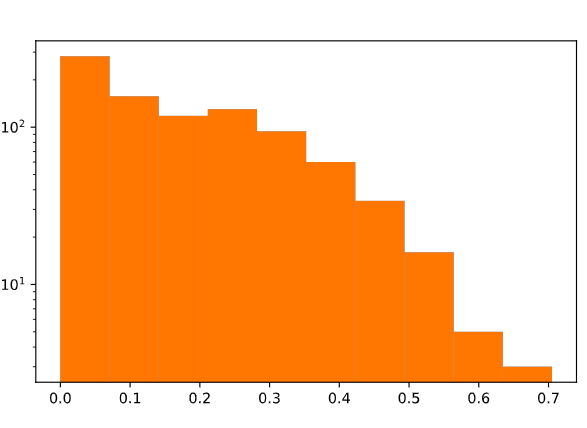

In [ ]:
#Exercise - Visualize the degree centrality distribution of the forums projection
# Import necessary modules
import matplotlib.pyplot as plt 
import networkx as nx

# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite']== 'forum']
# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G,nodes =forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.show()  

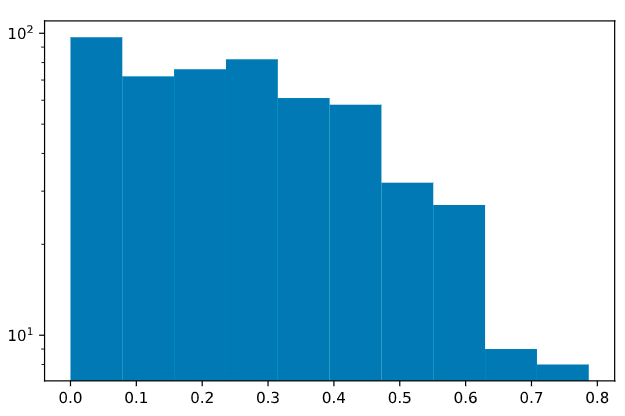

In [ ]:
#Exercise - Time filter on edges
import networkx as nx
from datetime import datetime

# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004,5,16)])

In [ ]:
#Exercise - Visualize filtered graph using nxviz
# Import necessary modules
from nxviz import CircosPlot
import networkx as nx
import matplotlib.pyplot as plt

# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.nodes[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c = CircosPlot(G_sub,node_color = 'bipartite',node_grouping = 'bipartite', node_order = 'dc')

# Draw c to screen
c.draw()

# Display the plot
plt.show() 



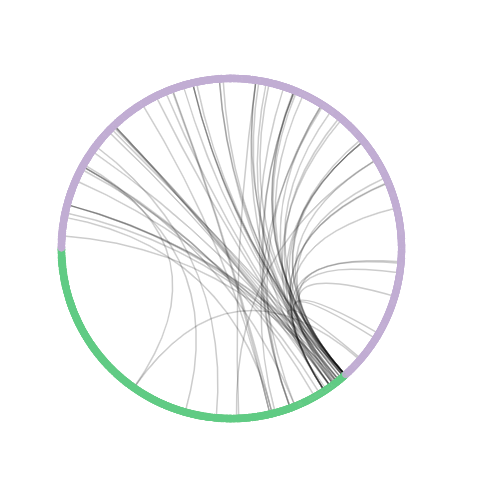

In [ ]:
#Exercise- Plot number of posts being made over time
# Import necessary modules
from datetime import timedelta  
import matplotlib.pyplot as plt

# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(days=2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    
    # Increment the curr_day by the time delta
    curr_day += td
    
# Create the plot
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.show()  


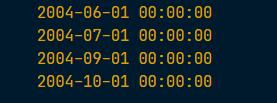

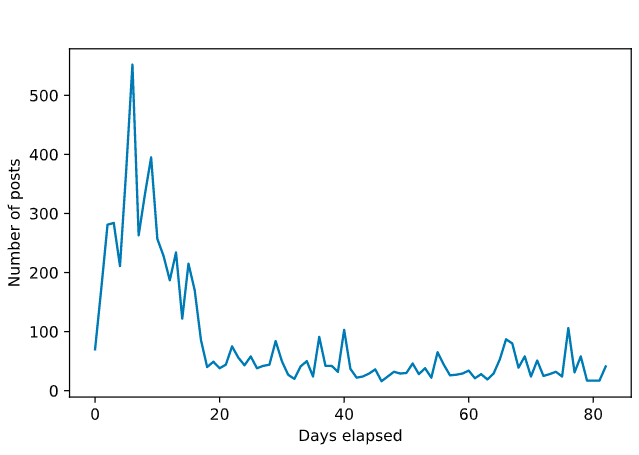

In [ ]:
#Exercise- Extract the mean degree centrality day-by-day on the students partition
from datetime import datetime, timedelta
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day)  
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, nodes= student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td
    
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.show()

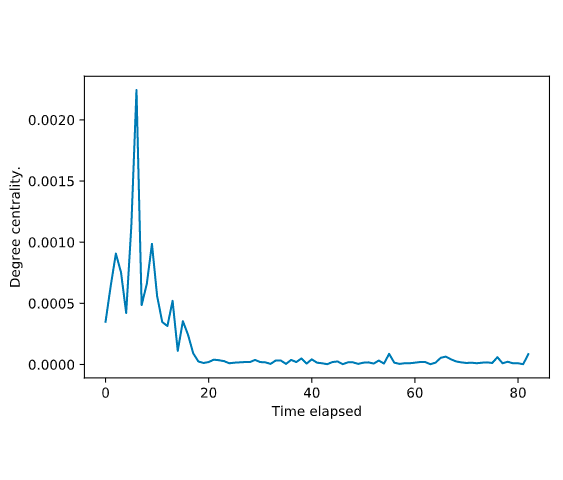

In [ ]:
#Exercise - Find the most popular forums day-by-day: I
# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

# Instantiate a list to hold the list of most popular forums by day: most_popular_forums
most_popular_forums = []
# Instantiate a list to hold the degree centrality scores of the most popular forums: highest_dcs
highest_dcs = []
curr_day = dayone  
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1: 
        print(curr_day) 
    # Instantiate new graph: G_sub
    G_sub = nx.Graph()
    
    # Add in nodes from original graph G
    G_sub.add_nodes_from(G.nodes(data= True))
    
    # Add in edges from the original graph G that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    # CODE CONTINUES ON NEXT EXERCISE
    curr_day += td

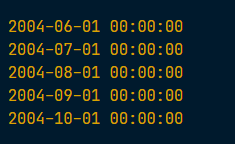

In [ ]:
#Exercise- Find the most popular forums day-by-day: II
# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

most_popular_forums = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, nodes= forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in dc.items() if dc == max(forum_dcs.values()) and dc != 0] 
    most_popular_forums.append(most_popular_forum) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.show()

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.show()


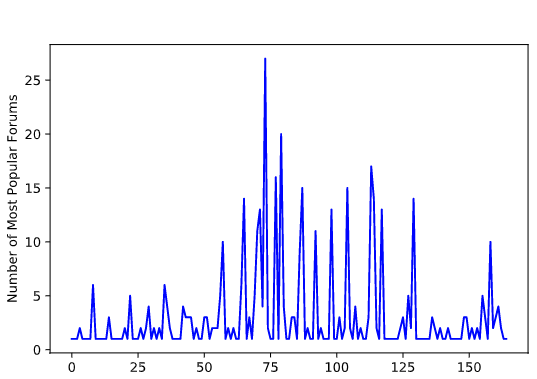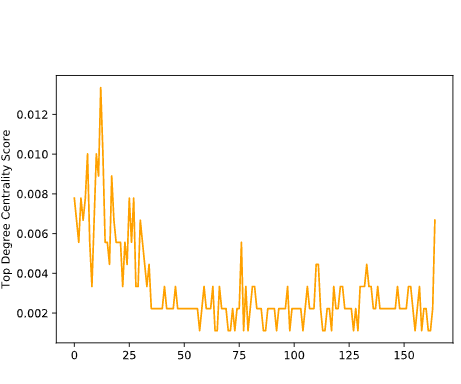